In [1]:
# load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from math import floor
from math import nan # importing nan to avoid overlapping in plotting datas
from datetime import datetime
# from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [232]:
# path of our dataframe
data_path =  "pioggia3_A.csv"

In [205]:
# RUN ON COLAB
# change me, have to point to the Meteotrentino drive folder
wk =  "/content/drive/My Drive/10. Meteotrentino/"

# folder for the csv
subfolder = "Dati csv convalidati/"

# select the filename, make me dynamic
selected_dataset = "umidità_A.csv"

data_path = wk+subfolder+selected_dataset

In [233]:
# select the filename of the dataset (Dario: dont judge me)
selected_dataset = os.path.basename(data_path).split('_A')[0] 
if selected_dataset > "vel":
  dataset_sensor = "Wind"
elif selected_dataset > "umidita":
  dataset_sensor = "Humidity"
elif selected_dataset > "temperatura":    
  dataset_sensor = "Temperature"
elif selected_dataset > "radiazione":
  dataset_sensor = "Radiation"
elif selected_dataset > "pioggia":
  dataset_sensor = "Rain"
elif selected_dataset > "direzione":
  dataset_sensor = "Wind Direction"
else:
  dataset_sensor = "Snow Height"
print(dataset_sensor)

Rain


In [234]:
# loading in pandas dataframe
df = pd.read_csv(
  data_path,
  sep = ";", # not a CSV, separator is ';'
  header = None, # no header
  dtype = {'0' : str, '1': str, '2': str, '3' : np.float64, '4':int}
  ) 


In [235]:
# define a header 
df= df.set_axis(
    ['label', 'date', 'time', 'value','validation_code'],
    axis = 1,
    inplace = False

)

/tmp/ipykernel_1796432/3586892922.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df= df.set_axis(


In [236]:
df['datetime'] = pd.to_datetime(df['date']+" "+df['time'], format = '%d/%m/%Y %H:%M')

In [237]:
df #Printing table

,label,date,time,value,validation_code,datetime
0,T0432,01/01/2014,00:00,0.0,1,2014-01-01 00:00:00
1,T0432,01/01/2014,00:05,0.0,1,2014-01-01 00:05:00
2,T0432,01/01/2014,00:10,0.0,1,2014-01-01 00:10:00
3,T0432,01/01/2014,00:15,0.0,1,2014-01-01 00:15:00
4,T0432,01/01/2014,00:20,0.0,1,2014-01-01 00:20:00
...,...,...,...,...,...,...
5868667,T0469,31/12/2021,23:35,0.0,1,2021-12-31 23:35:00
5868668,T0469,31/12/2021,23:40,0.0,1,2021-12-31 23:40:00
5868669,T0469,31/12/2021,23:45,0.0,1,2021-12-31 23:45:00
5868670,T0469,31/12/2021,23:50,0.0,1,2021-12-31 23:50:00


In [249]:
date_start = "31/01/2014" #@param {type:"string"}
date_end = "01/02/2014" #@param {type:"string"}
station_num = "T0432" #@param {type:"string"}

# Copy string date before converting it
date_start_caption = date_start
date_end_caption = date_end

# Convert date column in datetime format
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')

# Converting string in to datetime
date_start = datetime.strptime(date_start, '%d/%m/%Y')
date_end = datetime.strptime(date_end, '%d/%m/%Y')

# Create a dataframe of only that station in that day
df_filtered = df[(df['label'] == station_num) &
         (df['date'] >= date_start) & 
         (df['date'] <= date_end)]
# Inserting the 00:00 value of the next day
nextrow = df_filtered.index[0] + len(df_filtered.index)
df_filtered = df_filtered.append(df.iloc[nextrow],ignore_index = True)

#print query dataset
df_filtered

/tmp/ipykernel_1796432/3637809925.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered = df_filtered.append(df.iloc[nextrow],ignore_index = True)


,label,date,time,value,validation_code,datetime
0,T0432,2014-01-31,00:00,0.2,1,2014-01-31 00:00:00
1,T0432,2014-01-31,00:05,0.2,1,2014-01-31 00:05:00
2,T0432,2014-01-31,00:10,0.2,1,2014-01-31 00:10:00
3,T0432,2014-01-31,00:15,0.2,1,2014-01-31 00:15:00
4,T0432,2014-01-31,00:20,0.2,1,2014-01-31 00:20:00
...,...,...,...,...,...,...
569,T0432,2014-02-01,23:40,0.2,1,2014-02-01 23:40:00
570,T0432,2014-02-01,23:45,0.2,1,2014-02-01 23:45:00
571,T0432,2014-02-01,23:50,0.0,1,2014-02-01 23:50:00
572,T0432,2014-02-01,23:55,0.2,1,2014-02-01 23:55:00


In [250]:
# Split good and bad data into 2 samples 
y_signal = df_filtered.value
y_outliers = np.where(df_filtered["validation_code"] == 1, nan, df_filtered.value)

In [251]:
# Define the x axis value
x_range = range(len(df_filtered.time))
df_filtered["ax"] = df_filtered.datetime.astype(str)

for i in range(df_filtered.index[0], (df_filtered.index[0] + len(df_filtered.index))):
    df_filtered["ax"][i] = os.path.basename(df_filtered["ax"][i]).split('-')[2]
    
x_plot = np.array(df_filtered.ax)

df_filtered

/tmp/ipykernel_1796432/1046532283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["ax"][i] = os.path.basename(df_filtered["ax"][i]).split('-')[2]


,label,date,time,value,validation_code,datetime,ax
0,T0432,2014-01-31,00:00,0.2,1,2014-01-31 00:00:00,31 00:00:00
1,T0432,2014-01-31,00:05,0.2,1,2014-01-31 00:05:00,31 00:05:00
2,T0432,2014-01-31,00:10,0.2,1,2014-01-31 00:10:00,31 00:10:00
3,T0432,2014-01-31,00:15,0.2,1,2014-01-31 00:15:00,31 00:15:00
4,T0432,2014-01-31,00:20,0.2,1,2014-01-31 00:20:00,31 00:20:00
...,...,...,...,...,...,...,...
569,T0432,2014-02-01,23:40,0.2,1,2014-02-01 23:40:00,01 23:40:00
570,T0432,2014-02-01,23:45,0.2,1,2014-02-01 23:45:00,01 23:45:00
571,T0432,2014-02-01,23:50,0.0,1,2014-02-01 23:50:00,01 23:50:00
572,T0432,2014-02-01,23:55,0.2,1,2014-02-01 23:55:00,01 23:55:00


In [252]:
#Set dynamically dataset parameters
x_unit = "hour" 
x_symbol = 't'
y_tick = (ceil(max(y_signal)) - floor(min(y_signal))) // 5 # Step forward in y axis 

if dataset_sensor == "Wind":
    y_unit = "km/h"
    y_symbol = "W"
    x_tick = 48
elif dataset_sensor == "Humidity":
    y_unit = "%"
    y_symbol = "H"
    x_tick = 32  
elif dataset_sensor == "Temperature":    
    y_unit = "°C"
    y_symbol = "T"
    x_tick = 32  
elif dataset_sensor == "Radiation":
    y_unit = "W/m^2"
    y_symbol = "SR"
    x_tick = 32    
elif dataset_sensor == "Rain":
    y_unit = "mm/h"
    y_symbol = "R"
    x_tick = 96
    y_tick = (ceil(max(y_signal)) - floor(min(y_signal))) / 5
elif dataset_sensor == "Wind Direction":
    y_unit = "°"
    y_symbol = "D"
    x_tick = 48
else: # is Snow Height
    y_unit = "cm"
    y_symbol = "SH"
    x_tick = 32 

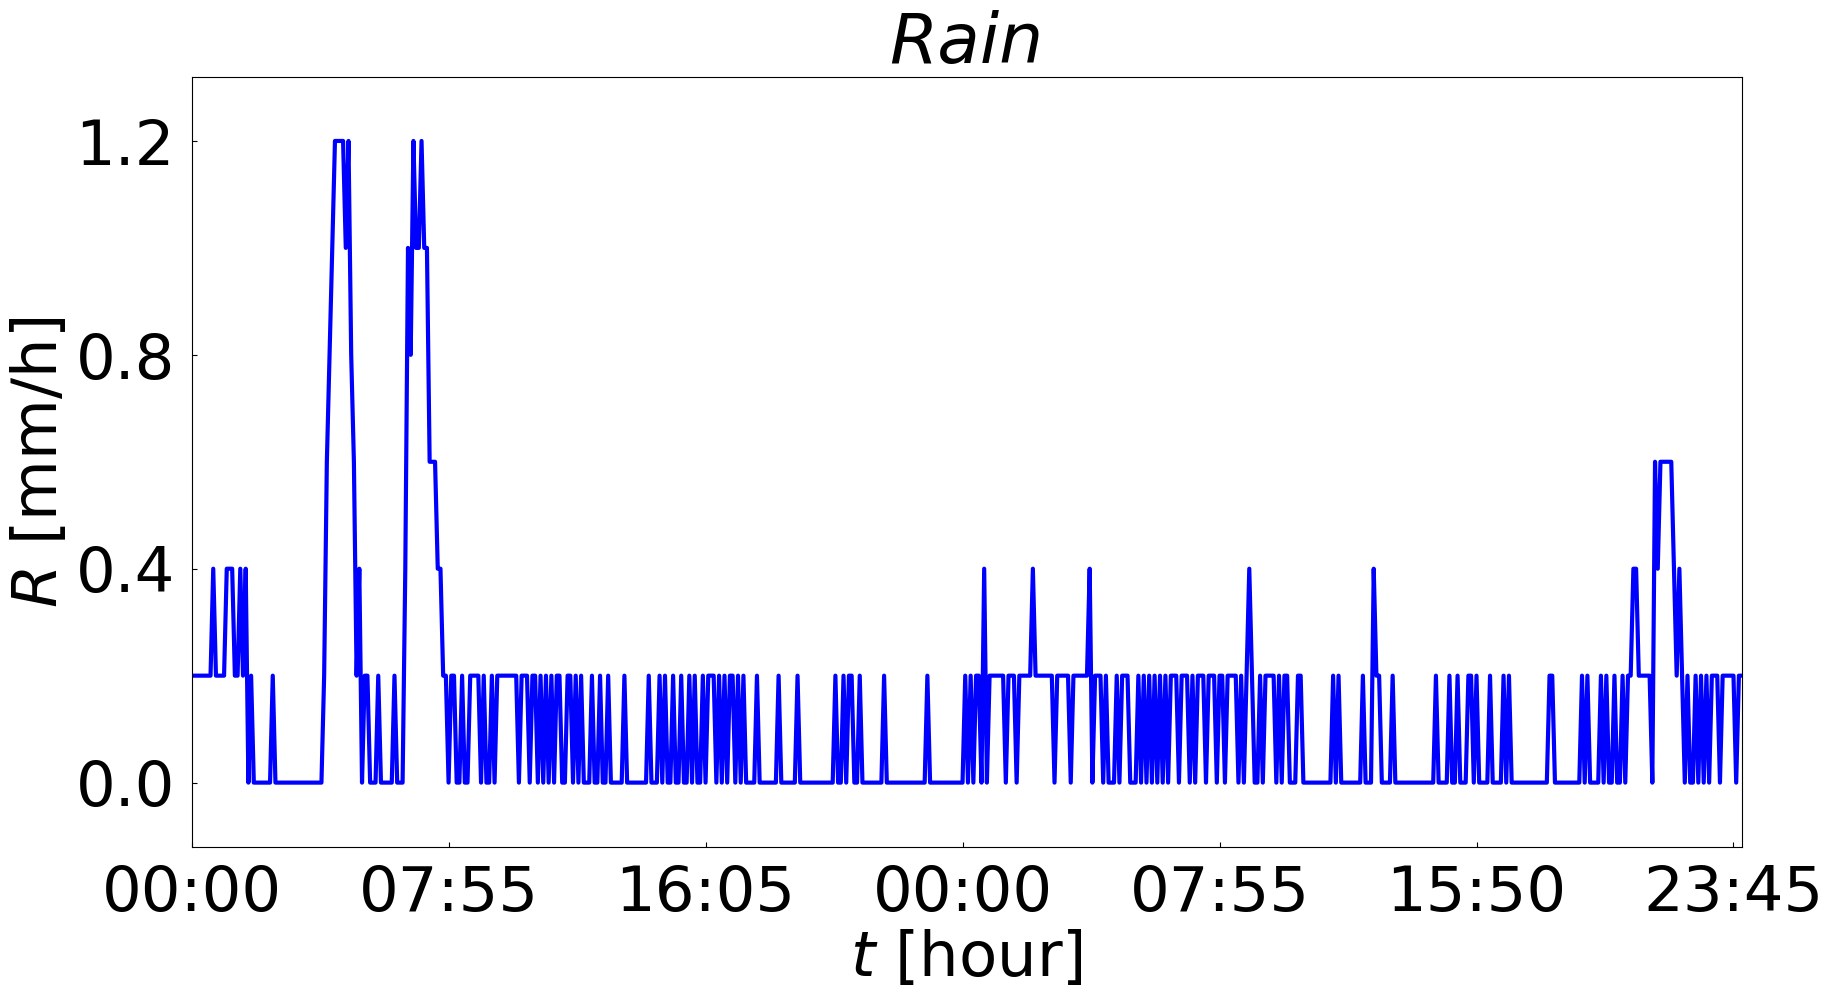

In [256]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Shapes sizes
figure_width = 20 #@param {type:"integer"}
figure_height = 10 #@param {type:"integer"}
x_margin = 0 #@param {type:"number"}
y_margin = 0.1 #@param {type:"number"}
file_format = 'eps' #@param {type:"string"}

# Setting font
font ="Verdana" #@param {type:"string"}
plt.rc(font)

# Styling text
title_fontsize = 50 #@param {type:"integer"}
label_fontsize = 45 #@param {type:"integer"}
legend_size = 18 #@param {type:"integer"}
axis_fontsize = 45 #@param {type:"integer"}
label_xmargin = 12 #@param {type:"integer"}
label_ymargin = 12 #@param {type:"integer"}
x_rotation_label = 0 #@param {type:"integer"}

# Set Unit
# x_unit = "hour" #@param {type:"string"}
# y_unit = "°" #@param {type:"string"} cambia in base al dataset
#
# Set tick 
# x_tick = 96 #@param {type:"integer"} cambia in base al dataset 1 ogni 15' (32), ogni 10' (48), ogni 5' (96)
# y_tick = (ceil(max(y_signal)) - floor(min(y_signal))) / 5 # cambia in base al dataset
offset = 2 #@param {type:"integer"} serve per far prendere l'ultimo valore, potrebbe variare in base a y_tick

# Reshaping the plot
f = plt.figure()
f.set_figwidth(figure_width)
f.set_figheight(figure_height)

# Create subplot
ax = plt.subplot()

# Set labels
plt.title(dataset_sensor,fontsize = title_fontsize, style = 'italic')
plt.xlabel('$\it{'+x_symbol+'}$' + ' [' + x_unit +']', fontsize = axis_fontsize)
plt.ylabel('$\it{'+y_symbol+'}$' + ' [' + y_unit +']', fontsize = axis_fontsize)
ax.tick_params(axis="y",direction="in",pad=label_ymargin)
plt.xticks(np.arange(0, df_filtered.shape[0], x_tick),fontsize=label_fontsize,rotation = x_rotation_label)
plt.yticks(np.arange(floor(min(y_signal)), ceil(max(y_signal)+offset), y_tick),fontsize=label_fontsize)
ax.tick_params(axis="x",direction="in",pad=label_xmargin)

# create tick label
x_tick_label = []
i = 0
while i < len(df_filtered):
    x_tick_label.append(df_filtered.time[i])
    i = i + x_tick
   
ax.set_xticklabels(x_tick_label) #should be ["00:00","08:00","16:00","00:00","08:00","16:00","00:00"] in 48h

# Plotting datas
plt.plot(x_plot, y_signal, "-",ms=8,color="blue", linewidth = 3)	
plt.plot(x_plot, y_outliers, "-",ms=8,mew=5,color="red")

## Making a legend
#ax.legend(['Good values', 'Bad values'], prop={'size': legend_size})

# Set margin
plt.margins(x=x_margin, y=y_margin)

#Saving as PDF
my_file = selected_dataset + "_" + station_num + '.' + file_format
#savewk = '/content/drive/My Drive/10. Meteotrentino/ReportPlots' #Colab
savewk = "" #local
plt.savefig(os.path.join(savewk, my_file), bbox_inches='tight')      

# Visualize
plt.show()

In [259]:
#Create Figure caption
print(dataset_sensor + " della stazione " + station_num + " dal giorno "+ date_start_caption + " al " + date_end_caption)

Rain della stazione T0432 dal giorno 31/01/2014 al 01/02/2014
